### ML with titanic dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading os DataSets: Treino e Teste
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train_df = train.drop(columns=["PassengerId"], axis=1) # removendo o id do passageiro
display(train_df)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.isnull().sum() / train_df.shape[0] * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

- Porcentagem de colunas com valores NA: `Age` com 19.86% de valores NA & `Cabin`com 77.10%. Irei remover essas colunas


In [5]:
# Removendo as colunas com maior porcentagem de valores NA
train_df = train.drop(columns=["PassengerId", "Age", "Cabin"], axis=1) # removendo as colunas PassenferId, Age e Cabin
train_df

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


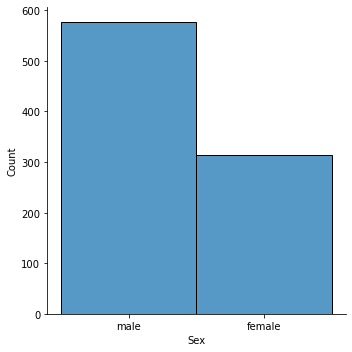

In [6]:
# Temos mais homens do que mulheres no navio
sns.displot(train_df['Sex']);

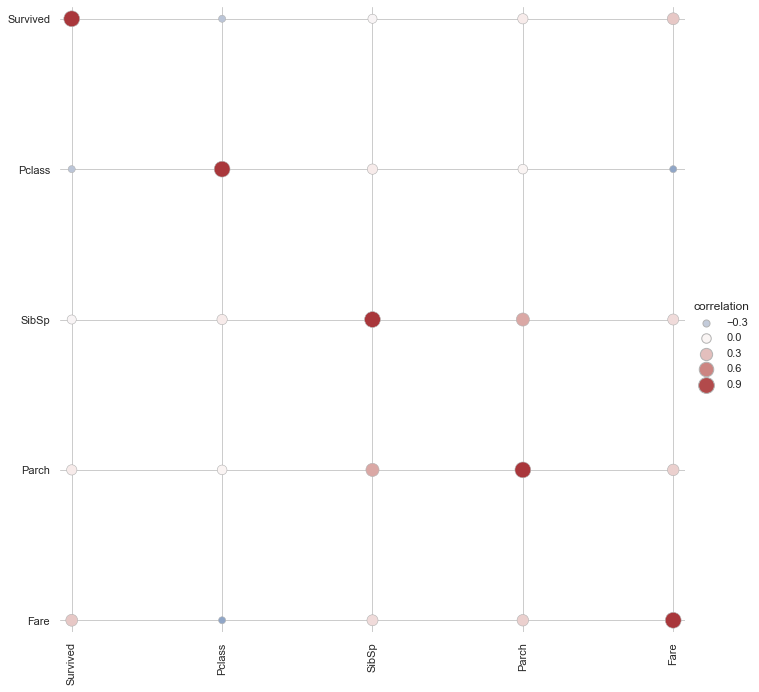

In [7]:
# Gosto de observar a correlação existente entre cada variável dentro do dataframe.

sns.set_theme(style="whitegrid")

corr_mat = train_df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

1. [ ] Observamos por meio do gráfio acima correlações entre as variáveis: `Parch` e `SibSp`
2. [ ] E também observamos uma correlação inversamente proporcional entre as variáveis: `Survived` e `Pclass`

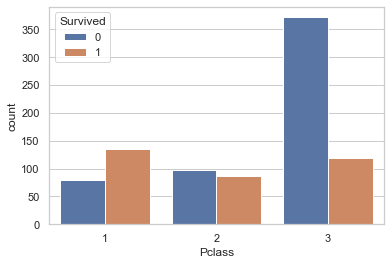

In [8]:
# Observamos que existem mais pessoas que não sobreviram comparadas com as que sobreviveram ao naufrágio
# E a classe que mais houve óbitos encontra-se na terceira classe (pegaram o bote salva vidas por último?
# ou morreram congelados devido a temperatura da água?)

sns.countplot(data=train_df, x="Pclass", hue="Survived");

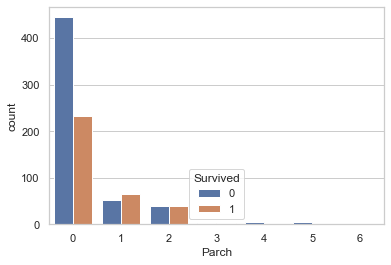

In [9]:
sns.countplot(data=train_df, x="Parch", hue="Survived");

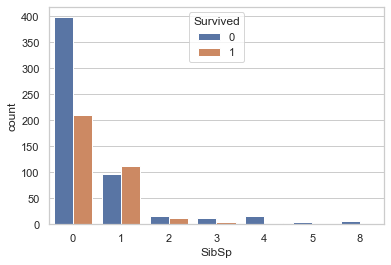

In [10]:
sns.countplot(data=train_df, x="SibSp", hue="Survived");

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


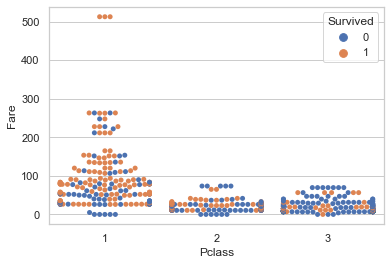

In [11]:
# As pessoas que estavam na primeira classe, tiveram mais oportunidades de sobreviverem?
# swarmplot, boxenplot, lineplot

sns.swarmplot(
    data=train_df,
    x="Pclass", y="Fare", hue="Survived"
);

In [12]:
# Sobreviveram ao naufrágio 342 pessoas e 549 pessoas morreram

train_df['Survived'].sum() , train_df[train_df['Survived'] == 0].count()

(342,
 Survived    549
 Pclass      549
 Name        549
 Sex         549
 SibSp       549
 Parch       549
 Ticket      549
 Fare        549
 Embarked    549
 dtype: int64)